In [72]:
import numpy as np
import random
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

In [158]:
X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=42)

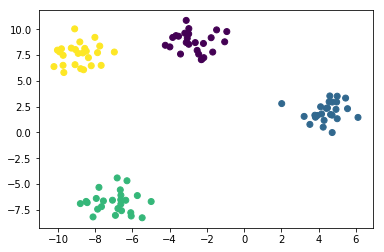

In [159]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [160]:
# from sklearn.cluster import KMeans

# model = KMeans(5)

# model.fit(X)

# model.labels_

# plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

# # for cluster in model.cluster_centers_:
# #     plt.scatter(cluster[0], cluster[1], s=100)

# colors = ["red", "green", "blue", "yellow", "black"]

# clr = [colors[item] for item in model.labels_]

# plt.scatter(X[:, 0], X[:, 1], c=clr)

In [161]:
class Cluster:
    
    def __init__(self, name, center):
        self.name = name
        self.center = center
        self.points = []
        
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points.clear()
    
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [162]:
class KMeansCustom:
    
    def __init__(self, n_clusters=8): 
        self.n_clusters = n_clusters
        
    def fit(self, X):
        
        # create n clusters
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(i, random.choice(X))
            clusters.append(cluster)
        
        errors = []
        # repeat max_iter times
        for i in range(10):
            
            labels = []
            # get a vote from every point
            for point in X:
                list_dist = []
                # point voting for clusters
                for cluster in clusters:
                    distance = cluster.distance(point)
                    list_dist.append((distance, cluster.name))
                    
                # selected clusted decided
                sel_dist, sel_cluster_name = sorted(list_dist)[0]
                sel_cluster = clusters[sel_cluster_name]
                sel_cluster.points.append(point)
                labels.append(sel_cluster_name)
            
            # readjust the centers
            for cluster in clusters:
                cluster.relocate()
                
            errors.append(self.error(clusters, labels, X))
                
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        self.labels_ = labels
        
        return errors
        
    def error(self, clusters, labels, X):
        
        err = 0
        for point, label in zip(X, labels):
            err += clusters[label].distance(point)
            
        return err / len(X)
                
        

In [163]:
model = KMeansCustom(4)

In [164]:
errors = model.fit(X)

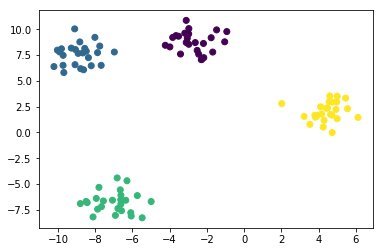

In [165]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)


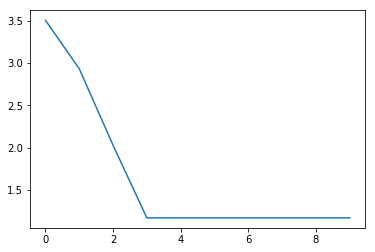

In [166]:
plt.plot(errors)

In [195]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [188]:
X, y = make_moons(noise=.1, random_state=42)

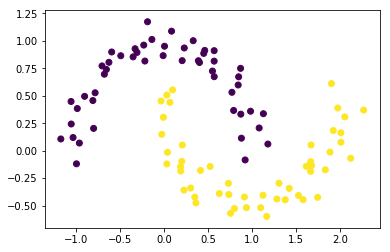

In [194]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [197]:
model = DBSCAN()

In [198]:
model.fit?

Signature: model.fit(X, y=None, sample_weight=None)
Docstring:
Perform DBSCAN clustering from features or distance matrix.

Parameters
----------
X : array or sparse (CSR) matrix of shape (n_samples, n_features), or                 array of shape (n_samples, n_samples)
    A feature array, or array of distances between samples if
    ``metric='precomputed'``.
sample_weight : array, shape (n_samples,), optional
    Weight of each sample, such that a sample with a weight of at least
    ``min_samples`` is by itself a core sample; a sample with negative
    weight may inhibit its eps-neighbor from being core.
    Note that weights are absolute, and default to 1.

y : Ignored
File:      ~/anaconda3/lib/python3.7/site-packages/sklearn/cluster/dbscan_.py
Type:      method


In [192]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

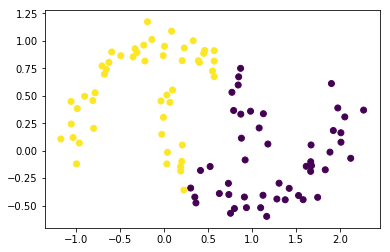

In [193]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)